In [1]:
"""Start"""

'Start'

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pickle as pkl

In [6]:
with open('mnist_data.pkl', 'rb') as f:
    data = pkl.load(f)

In [7]:
type(data)

dict

In [8]:
Data=pd.read_pickle('mnist_data.pkl')

In [9]:
type(Data)

dict

In [10]:
data.keys()

dict_keys(['trainLabels', 'testImages', 'testLabels', 'trainImages'])

In [11]:
train_data = data['trainImages']

In [12]:
train_data = np.array(train_data)

In [13]:
train_data.shape

(800, 784)

In [14]:
train_label = np.array(data['trainLabels'])

In [15]:
train_label.shape

(800,)

In [16]:
test_data = np.array(data['testImages'])

In [17]:
test_data.shape

(200, 784)

In [18]:
test_label = np.array(data['testLabels'])

In [19]:
train_data = pd.DataFrame(train_data)

In [20]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_label = pd.DataFrame(train_label)

In [22]:
train_label.head()

,0
0,5
1,0
2,4
3,1
4,9


In [23]:
test_data = pd.DataFrame(test_data)

In [24]:
test_label = pd.DataFrame(test_label)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(test_data)

MinMaxScaler()

In [28]:
scaled_train_data = scaler.transform(train_data)

In [29]:
scaled_test_data = scaler.transform(test_data)

In [30]:
scaled_train_data.shape

(800, 784)

In [31]:
scaled_test_data.shape

(200, 784)

In [36]:
print(train_data.iloc[0].argmax())
print(train_data.iloc[0].max())

161
255


In [37]:
print(scaled_train_data[0].argmax())
print(scaled_train_data[0].max())

161
1.0


In [38]:
import seaborn as sns

In [39]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
five = np.array(train_data.iloc[0])

In [41]:
five=five.reshape((28,28))
five.shape

(28, 28)

In [42]:
type(five)

numpy.ndarray

<AxesSubplot:>

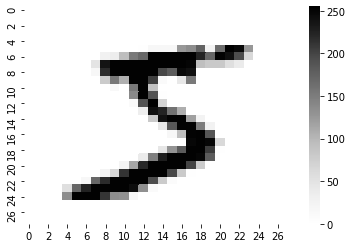

In [43]:
sns.heatmap(five,cmap='Greys')

In [44]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [46]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('number of GPUs available', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

number of GPUs available 1


In [47]:
no_of_features=scaled_train_data.shape[1]

In [48]:
no_of_classes = len(np.unique(train_label.values))
no_of_classes

10

In [49]:
%%time
# Model Creation

model = Sequential([
    Dense(units=16, input_shape=(no_of_features,), activation='relu'), #this is first hidden layer and input layer too, with 16 nodes in hidden layer and input layer = input_layer(features,).
    Dense(units=32, activation='relu'), # this is second hidden layer, here Dense is fully connected layer
    Dense(units=no_of_classes, activation='softmax') # this is output layer with number of nodes = number of classes to classify
])

CPU times: user 1min 28s, sys: 1.47 s, total: 1min 30s
Wall time: 1min 59s


In [50]:
# print the model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [51]:
# prepare the model for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
type(train_label)

pandas.core.frame.DataFrame

In [57]:
scaled_train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
%%time
# Training happens here
model.fit(
        x = scaled_train_data,
        y = train_label.values,
        batch_size = 10,   # as batch size increses runtime decreases but required memory to process all these data at one is high
        epochs = 30, # how many print statements do u wanna see, or how many times do we wanna train the model with the same dataset
        verbose = 2 # 2- we can see full info, 1- we can see min info, 0- we cannot see any info printed in screen
)
# batch size is how many samples do we need to send in to the model at a time
# iteration is how many batches should we send into the model to cover the dataset, or number of iterations
# here epoch = 30 means 800 samples are sent into the model for training 30 times.
# therefore as epoch increases model overfits training data

Epoch 1/30
80/80 - 0s - loss: 2.3372 - accuracy: 0.2163
Epoch 2/30
80/80 - 0s - loss: 1.7164 - accuracy: 0.5113
Epoch 3/30
80/80 - 0s - loss: 1.1919 - accuracy: 0.7000
Epoch 4/30
80/80 - 0s - loss: 0.8118 - accuracy: 0.8062
Epoch 5/30
80/80 - 0s - loss: 0.5986 - accuracy: 0.8487
Epoch 6/30
80/80 - 0s - loss: 0.4607 - accuracy: 0.8850
Epoch 7/30
80/80 - 0s - loss: 0.3620 - accuracy: 0.8938
Epoch 8/30
80/80 - 0s - loss: 0.2923 - accuracy: 0.9237
Epoch 9/30
80/80 - 0s - loss: 0.2409 - accuracy: 0.9438
Epoch 10/30
80/80 - 0s - loss: 0.2025 - accuracy: 0.9488
Epoch 11/30
80/80 - 0s - loss: 0.1730 - accuracy: 0.9663
Epoch 12/30
80/80 - 0s - loss: 0.1433 - accuracy: 0.9725
Epoch 13/30
80/80 - 0s - loss: 0.1173 - accuracy: 0.9787
Epoch 14/30
80/80 - 0s - loss: 0.0967 - accuracy: 0.9862
Epoch 15/30
80/80 - 0s - loss: 0.0831 - accuracy: 0.9887
Epoch 16/30
80/80 - 0s - loss: 0.0704 - accuracy: 0.9912
Epoch 17/30
80/80 - 0s - loss: 0.0611 - accuracy: 0.9925
Epoch 18/30
80/80 - 0s - loss: 0.0511 - 

In [58]:
""" the above print statement 
    Epoch epoch/30
    iteration/80 -time to process one epoch - loss - accuracy
"""

' the above print statement \n    Epoch epoch/30\n    iteration/80 -time to process one epoch - loss - accuracy\n'

In [59]:
#In the above cell 80 is number of iterations, iterations(80)*batch_size(10) = size of data(800) 

In [60]:
%%time
# fit model method - 2
# we fit model specifying validation set proportion and getting accuracy of validation data in the same statement
# Training happens here
model.fit(
        x = scaled_train_data,
        y = train_label.values,
        validation_split = 0.1, # 10% of the train_data as test or holdout set for evaluation of our model
        batch_size = 10,   
        epochs = 30, 
        verbose = 2 
)
# this method does not shuffle and create validation set
# this method just takes the last 10% as validation set 
# so shuffle the data beforehand before using this method

Epoch 1/30
72/72 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 2/30
72/72 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 3/30
72/72 - 0s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 4/30
72/72 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 5/30
72/72 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 6/30
72/72 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7/30
72/72 - 0s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 8/30
72/72 - 0s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 9/30
72/72 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 10/30
72/72 - 0s - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 11/30
72/72 -

In [61]:
# prediction starts here
prediction = model.predict(x = scaled_test_data, batch_size=10, verbose=1) # this does not work same as sklearn predict
# sklearn predict only returns dominant class name
# tf predict returns all probabilities of all classes.
# highest probability-class is our prediction
# 20 iterations

20/20 [==============================] - 0s 1ms/step


In [62]:
type(prediction)

numpy.ndarray

In [63]:
prediction.shape

(200, 10)

In [64]:
for i in range(3):
    print(prediction[i])

[7.6946241e-11 5.4631491e-14 2.0902110e-07 2.5058486e-10 2.0479429e-06
 1.6396093e-10 1.4211779e-08 4.8479751e-07 4.8265083e-06 9.9999249e-01]
[9.8986708e-10 1.6658111e-08 1.4801939e-04 2.8957513e-05 9.9975342e-01
 3.6743121e-08 2.2278107e-05 5.8205875e-12 4.6086268e-05 1.1723678e-06]
[1.0260111e-08 5.6156416e-11 3.3698864e-06 2.0580300e-10 7.4236421e-05
 5.0464728e-06 9.9991441e-01 2.9638036e-08 2.1893500e-06 7.6012532e-07]


In [65]:
test_label.head(3)

,0
0,9
1,2
2,6


In [66]:
for i in range(3):
    print(prediction[i].argmax()) #argmax() returns index of max value

9
4
6


In [67]:
rounded_prediction = np.argmax(prediction, axis=-1) # getting actual class prediction

In [68]:
for i in range(3):
    print(rounded_prediction[i])

9
4
6


In [69]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

In [70]:
cm = confusion_matrix(test_label.values, rounded_prediction)
cm

array([[16,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  2,  0,  0,  0,  1,  1],
       [ 0,  0,  0, 17,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  1,  0, 20,  1,  1,  0,  0,  1],
       [ 0,  0,  1,  1,  1, 15,  1,  0,  1,  0],
       [ 0,  0,  1,  0,  1,  1, 17,  0,  1,  0],
       [ 0,  0,  1,  0,  2,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  1],
       [ 1,  0,  1,  0,  1,  0,  0,  1,  1, 11]])

<AxesSubplot:>

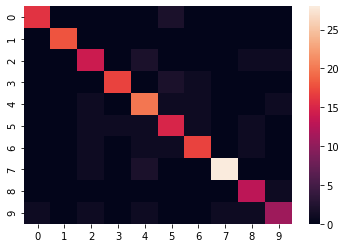

In [71]:
sns.heatmap(cm)

In [72]:
# this code is copied from sklearn documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[16  0  0  0  0  2  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  2  0  0  0  1  1]
 [ 0  0  0 17  0  2  1  0  0  0]
 [ 0  0  1  0 20  1  1  0  0  1]
 [ 0  0  1  1  1 15  1  0  1  0]
 [ 0  0  1  0  1  1 17  0  1  0]
 [ 0  0  1  0  2  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  0 13  1]
 [ 1  0  1  0  1  0  0  1  1 11]]


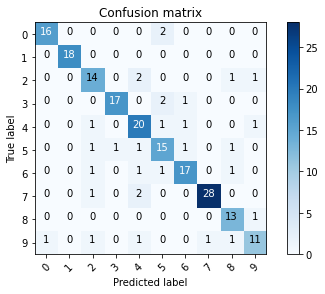

In [73]:
plot_confusion_matrix(cm, classes = [0,1,2,3,4,5,6,7,8,9])

In [74]:
# Getting Scores of our model with teat set
loss, acc = model.evaluate(scaled_test_data, test_label.values, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.8450


In [75]:
print('Loss = ',loss,' Accuracy = ',acc)

Loss =  0.8035237789154053  Accuracy =  0.8450000286102295


In [76]:
# Saving and Loading Keras Sequential Model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [69]:
import os.path
if os.path.isfile('model1.h5') is False:
    model.save('model.h5')
# it saves the following
# architecture
# weights of model
# train confif (loss,optimizer)
# the state of optimiser, allow you to resume training

In [70]:
# Open our saved model
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')

In [71]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [72]:
new_model.get_weights()

[array([[ 3.0318581e-02,  9.8677799e-03,  2.8932765e-03, ...,
         -4.4131532e-02,  4.3630719e-02,  8.1310704e-02],
        [-4.7831573e-02, -8.2184747e-02, -4.2926297e-03, ...,
          2.4103701e-02, -4.1499734e-05, -5.4506276e-02],
        [ 6.8025246e-02,  3.3849701e-02, -6.6073239e-02, ...,
         -7.0387565e-02, -8.0501489e-02, -3.9979845e-02],
        ...,
        [-7.4213430e-02,  8.8675097e-03, -9.4974786e-04, ...,
          3.7549309e-02, -2.2386417e-02,  5.7165131e-02],
        [ 7.3934108e-02, -2.7333200e-02, -3.6116462e-02, ...,
         -3.1607490e-02,  2.7882487e-02, -7.9632945e-02],
        [ 1.3119042e-02,  8.3579317e-02,  1.0976940e-03, ...,
          6.5846935e-02,  2.9771850e-02, -2.0735838e-02]], dtype=float32),
 array([ 0.05839132,  0.10072966, -0.01060716,  0.14422147,  0.07591735,
         0.15561   ,  0.04639872, -0.07981984,  0.13379131,  0.13790405,
        -0.01253582,  0.04715741, -0.02491457,  0.01622671,  0.01986819,
         0.09637219], dtype=flo

In [73]:
new_model.optimizer

In [74]:
# Save only the architecture and not weights,training config.
json_string = model.to_json()

In [75]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "de

In [76]:
# load from JSON string
from tensorflow.keras.models import model_from_json
model_arch = model_from_json(json_string)

In [77]:
model_arch.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_arch.optimizer # prints nothing

In [79]:
# Only save weights of a model
model.save_weights('model_weight_1.h5')

In [80]:
# the problem with this is, we need a model to load the above weights file
# That model should have the same architecture as the previous model from which the weights are saved.

In [81]:
%%time
# Model Creation

model2 = Sequential([
    Dense(units=16, input_shape=(no_of_features,), activation='relu'), 
    Dense(units=32, activation='relu'), 
    Dense(units=no_of_classes, activation='softmax') 
])

CPU times: user 26.3 ms, sys: 0 ns, total: 26.3 ms
Wall time: 25.1 ms


In [82]:
model2.load_weights('model_weight_1.h5')

In [83]:
model2.get_weights()

[array([[ 3.0318581e-02,  9.8677799e-03,  2.8932765e-03, ...,
         -4.4131532e-02,  4.3630719e-02,  8.1310704e-02],
        [-4.7831573e-02, -8.2184747e-02, -4.2926297e-03, ...,
          2.4103701e-02, -4.1499734e-05, -5.4506276e-02],
        [ 6.8025246e-02,  3.3849701e-02, -6.6073239e-02, ...,
         -7.0387565e-02, -8.0501489e-02, -3.9979845e-02],
        ...,
        [-7.4213430e-02,  8.8675097e-03, -9.4974786e-04, ...,
          3.7549309e-02, -2.2386417e-02,  5.7165131e-02],
        [ 7.3934108e-02, -2.7333200e-02, -3.6116462e-02, ...,
         -3.1607490e-02,  2.7882487e-02, -7.9632945e-02],
        [ 1.3119042e-02,  8.3579317e-02,  1.0976940e-03, ...,
          6.5846935e-02,  2.9771850e-02, -2.0735838e-02]], dtype=float32),
 array([ 0.05839132,  0.10072966, -0.01060716,  0.14422147,  0.07591735,
         0.15561   ,  0.04639872, -0.07981984,  0.13379131,  0.13790405,
        -0.01253582,  0.04715741, -0.02491457,  0.01622671,  0.01986819,
         0.09637219], dtype=flo

In [84]:
""" Now we start with CNN """

' Now we start with CNN '

In [85]:
scaled_train_data.shape

(800, 784)

In [86]:
image_train_data=scaled_train_data.reshape(800,28,28)

In [87]:
image_train_data.shape

(800, 28, 28)

In [88]:
image_train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<AxesSubplot:>

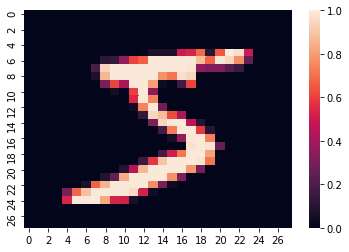

In [89]:
sns.heatmap(image_train_data[0])

In [90]:
image_test_data=scaled_test_data.reshape(200,28,28)

<AxesSubplot:>

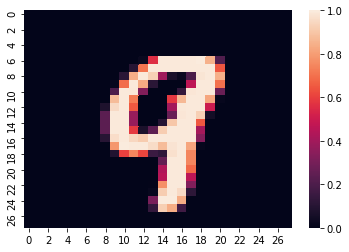

In [91]:
sns.heatmap(image_test_data[0])

In [92]:
# all the libraries required
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout


In [93]:
# here some shit about dimension conversion for cnn
np.array([1,2,3,4,5]).reshape(5,1)

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [94]:
image_train_data=scaled_train_data.reshape(800,28,28,1)
image_test_data=scaled_test_data.reshape(200,28,28,1)

In [95]:
no_of_image_features = image_train_data.shape[1:]
no_of_output = len(np.unique(train_label.values))
print(no_of_image_features,no_of_output)

(28, 28, 1) 10


In [96]:
%%time
# CNN model creation
cnn_model = Sequential([
    Conv2D(32, (3,3), input_shape = no_of_image_features, activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(units=64, activation = 'relu'),
    Dropout(0.5),
    Dense(units=no_of_output, activation = 'softmax')
])

CPU times: user 85.8 ms, sys: 41 µs, total: 85.9 ms
Wall time: 126 ms


In [97]:
# Model compilation step: specifying loss and configurations
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [98]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                346176    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [99]:
# model fitting with validation set
cnn_model.fit(image_train_data, train_label.values, validation_split = 0.1, batch_size = 10, epochs = 30, verbose = 2 )

Epoch 1/30
72/72 - 1s - loss: 2.0251 - accuracy: 0.4417 - val_loss: 1.5640 - val_accuracy: 0.6375
Epoch 2/30
72/72 - 0s - loss: 1.3579 - accuracy: 0.6986 - val_loss: 1.5565 - val_accuracy: 0.7750
Epoch 3/30
72/72 - 0s - loss: 1.0233 - accuracy: 0.7694 - val_loss: 1.2537 - val_accuracy: 0.7750
Epoch 4/30
72/72 - 0s - loss: 0.8052 - accuracy: 0.8208 - val_loss: 1.1674 - val_accuracy: 0.8250
Epoch 5/30
72/72 - 0s - loss: 0.7074 - accuracy: 0.8264 - val_loss: 1.4679 - val_accuracy: 0.8375
Epoch 6/30
72/72 - 0s - loss: 0.6548 - accuracy: 0.8556 - val_loss: 1.4220 - val_accuracy: 0.8625
Epoch 7/30
72/72 - 0s - loss: 0.4852 - accuracy: 0.8653 - val_loss: 1.4175 - val_accuracy: 0.8250
Epoch 8/30
72/72 - 0s - loss: 0.6119 - accuracy: 0.8736 - val_loss: 1.4870 - val_accuracy: 0.8500
Epoch 9/30
72/72 - 0s - loss: 0.4497 - accuracy: 0.8889 - val_loss: 1.3374 - val_accuracy: 0.8625
Epoch 10/30
72/72 - 0s - loss: 0.3529 - accuracy: 0.9222 - val_loss: 1.2923 - val_accuracy: 0.8750
Epoch 11/30
72/72 -

In [100]:
# let's see test perfomance
# Run on CPU
with tf.device('/cpu:0'):
    loss, acc = cnn_model.evaluate(image_test_data, test_label.values, verbose=1)
print("loss_cnn = ", loss, " Accuracy_cnn = ", acc)

7/7 [==============================] - 0s 8ms/step - loss: 0.3980 - accuracy: 0.8900
loss_cnn =  0.39795586466789246  Accuracy_cnn =  0.8899999856948853


In [101]:
cnn_prediction = cnn_model.predict(image_test_data, verbose=1)

7/7 [==============================] - 1s 122ms/step


In [102]:
rounded_cnn_prediction = np.argmax(cnn_prediction, axis = -1)

In [103]:
rounded_cnn_prediction.shape

(200,)

Confusion matrix, without normalization
[[17  0  1  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 14  1  1  0  0  0  1  1]
 [ 1  0  0 17  0  1  1  0  0  0]
 [ 0  0  0  0 22  0  1  0  0  1]
 [ 0  0  0  1  0 17  1  0  1  0]
 [ 0  1  0  0  0  2 18  0  0  0]
 [ 0  0  0  0  1  0  0 28  0  2]
 [ 0  1  0  0  0  0  0  0 13  0]
 [ 1  0  0  0  0  0  0  1  0 14]]


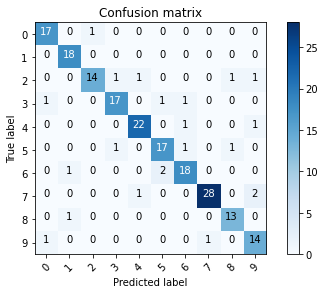

In [104]:
import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label.values, rounded_cnn_prediction)
plot_confusion_matrix(cm, classes = [0,1,2,3,4,5,6,7,8,9])

In [105]:
cnn_model.save('cnn_model1.h5')

In [106]:
### Therefore normal Feed Forward NN gives accuracy = 0.8450000286102295
### CNN NN gives accuracy = 0.8799999952316284
### Thank You